In [1]:
import torax
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
torax_config = torax.build_torax_config_from_file('examples/iterhybrid_rampup.py')
torax_config.update_fields({
    "numerics.fixed_dt": 1.0,
    "numerics.t_final": 50.0,   # <-- set what you want here
})
data_tree, state_history = torax.run_simulation(torax_config)
data_tree.to_netcdf('iter.nc')

INFO:2025-12-17 22:53:44,329:jax._src.xla_bridge:812: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2025-12-17 22:53:44,329 [    INFO] Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2025-12-17 22:53:44,332 [ WARNING] An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
2025-12-17 22:53:46,151 [ WARNING] Falling back to legacy behavior as `profile_conditions.psi` is None. Future versions of TORAX will require `psi` to be provided if `initial_psi_mode` is PROFILE_CONDITIONS. Use `initial_psi_mode` to initialize psi from `j` or `geometry` and avoid this warning.
2025-12-17 22:53:46,912 [    INFO] Loading QLKNNModel from /home/dani/projects/dani2442_code/.venv/lib/python3.11/site-packages/fusion_surrogates/qlknn/models/qlknn_7_11.qlknn
2025-12-17 

In [3]:
dt = xr.open_datatree("iter.nc")

In [4]:
dt.profiles

<xarray.DataTree 'profiles'>
Group: /profiles
    Dimensions:                     (time: 51, rho_face_norm: 26,
                                     rho_cell_norm: 25, rho_norm: 27,
                                     impurity_symbol: 1)
    Coordinates:
      * impurity_symbol             (impurity_symbol) <U2 8B 'Ne'
    Inherited coordinates:
      * time                        (time) float64 408B 0.0 1.0 2.0 ... 49.0 50.0
      * rho_face_norm               (rho_face_norm) float64 208B 0.0 0.04 ... 1.0
      * rho_cell_norm               (rho_cell_norm) float64 200B 0.02 0.06 ... 0.98
      * rho_norm                    (rho_norm) float64 216B 0.0 0.02 ... 0.98 1.0
    Data variables: (12/83)
        n_i                         (time, rho_norm) float64 11kB ...
        q                           (time, rho_face_norm) float64 11kB ...
        pressure_thermal_e          (time, rho_norm) float64 11kB ...
        Z_i                         (time, rho_norm) float64 11kB ...
        n_impurity                  (time, rho_norm) float64 11kB ...
        T_i                         (time, rho_norm) float64 11kB ...
        ...                          ...
        epsilon                     (time, rho_norm) float64 11kB ...
        g0_over_vpr                 (time, rho_face_norm) float64 11kB ...
        g1_over_vpr                 (time, rho_norm) float64 11kB ...
        g1_over_vpr2                (time, rho_norm) float64 11kB ...
        gm9                         (time, rho_norm) float64 11kB ...
        r_mid                       (time, rho_norm) float64 11kB ...

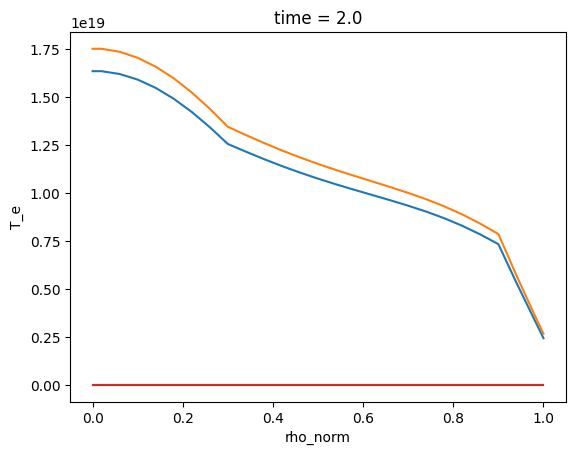

In [5]:
dt.profiles.n_i.sel(time=2, method='nearest').plot()
dt.profiles.n_e.sel(time=2, method='nearest').plot()
dt.profiles.T_i.sel(time=2, method='nearest').plot()
dt.profiles.T_e.sel(time=2, method='nearest').plot()